In [1]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

import itertools

# ROC AUC 
доля правильно упорядоченных пар вида (0, 1), т.е. из тестовой выборки формируются n * m пар, в которых 0 стоит на первом месте, а на втором 1. Для этих пар вероятности должны иметь тот же порядок, например (0.1, 0.2). Для пар с разными метками (1 и 0), но одинаковыми вероятностями будем умножать число таких пар на 0.5

In [2]:
def show_roc(y, score, title='ROC Curve', show_pred=False, treshold=0.5):
    fpr, tpr, thresholds = roc_curve(y, score, pos_label=1)
    plt.plot(fpr, tpr, "k--", label='roc curve')
    plt.plot([0, 1], [0, 1])
    
    if show_pred:
        predictions=(pred>=treshold).astype(int)
        fpr, tpr, thresholds = roc_curve(y, predictions, pos_label=1)
        plt.plot(fpr, tpr, color='g', label=f"predictions (treshold = {treshold})")
        
    plt.axis("square")
    plt.title(title)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

In [3]:
def roc_auc(y, probs):
    y_probs = np.array([y, probs]).T
    n_pairs = sum(y == 0) * sum(y == 1) # number of pairs like (0, 1)

    n_right_pairs = 0 # number of pairs like (0, 1) and predictions (0.1, 0.2)
    for x in list(itertools.product(y_probs, y_probs)):
        if x[0][0] < x[1][0]:

            if x[0][1] < x[1][1]:
                n_right_pairs += 1

            elif x[0][1] == x[1][1]:
                n_right_pairs += 0.5
            else:
                n_right_pairs += 0 


    roc_score = n_right_pairs / n_pairs

    return roc_score

### Заметим, что для бинарных классификаторов ROC Curve вседа состоит из трёх точек, соединёнными линиями: (0,0), (FPR, TPR), (1, 1), где FPR и TPR соответствуют любому порогу из интервала (0, 1).

Вопрос: может ли ROC AUC увеличиться после бинаризации?

Да, может.
ROC AUC - это доля правильно упорядоченных пар виды (0, 1). При бинаризации мы оставляем их порядок, однако некоторым объектам присвиваем одиноковые метки (1, 1) или (0, 0). Соответственно, они либо уменьшают, либо увеличивают свой вес в 0.5 раз соответсвенно.

### Максимум на сколько может увеличиться AUC_ROC при использовании функции min(x, 0.5) над оценками алгоритма? на 0.5

### В тестовой выборке 10 объектов, известно, что AUC_ROC < 1. Какое максимальное значение может быть у AUC_ROC?

In [234]:
null = 5
ones = 10 - null
print('всего возможных пар (null - 10*null^2): ', null * ones) # как можно меньше клетка
print(f'9 объектов классифицировалли правильно (24 пары), один неуверенны (вероятности равны): ', (24+0.5)/25)

всего возможных пар (null - 10*null^2):  25
9 объектов классифицировалли правильно (24 пары), один неуверенны (вероятности равны):  0.98


### Может ли сумма двух алгоритмов с AUC_ROC = 0.5 иметь AUC_ROC = 1 (имеется в виду, что мы суммируем оценки, полученные разными алгоритмами)?

Возьмем алгоритм, ответы которого увеливают(уменбшают) правильные ответы класса 1(0) на константу, на неправильные корректриуют.

### Задача XOR (первый класс – (-1, -1), (+1, +1), второй – (-1, +1), (+1, -1)) решается линейным алгоритмом (оценка – линейная комбинация признаков). Чему равно максимально возможное значение AUC_ROC? 

In [254]:
print('(0, 1) and (I, II) = (c<1, 1) +0\n(0, 1) and (I, IV) = (c<1, 1) +0\n(0, 1) and (III, II) = (0, 1) +1\n(0, 1) and (III, IV) = (0, 1) +1')
print('Answer: 1/2')


(0, 1) and (I, II) = (c<1, 1) +0
(0, 1) and (I, IV) = (c<1, 1) +0
(0, 1) and (III, II) = (0, 1) +1
(0, 1) and (III, IV) = (0, 1) +1
Answer: 1/2


### Если AUC ROC увеличился на 0.1, то Gini... 
Gini = 2*AUC - 1 = 2 (x + 0.1) - 1 = Gini + 0.2

### После округления ответов на тестовой выборке до 2 знака после запятой (0.7235 -> 0.72) значение AUC_ROC

может остаться прежним, увеличиться или уменьшиться

### Может ли сумма двух алгоритмов с AUC_ROC = 1 иметь AUC_ROC < 1 (имеется в виду, что мы суммируем оценки, полученные разными алгоритмами)?

нет

### Максимум на сколько может уменьшиться AUC_ROC при использовании функции (x+1)/2 над оценками алгоритма?
ни на сколько  - это положительное преобразование, которое не меняет монотонный порядок предсказаний

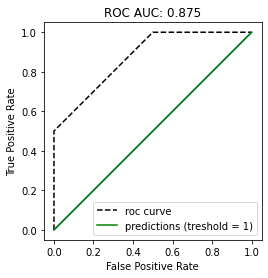

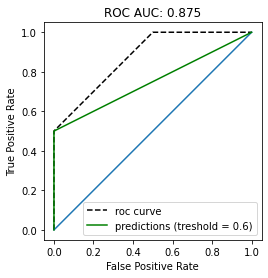

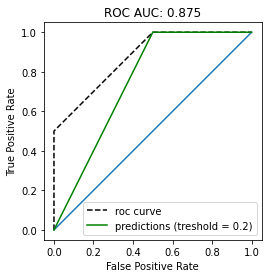

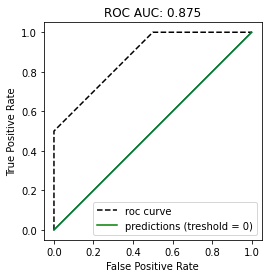

In [225]:
y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.5, 0.5, 0.8])

show_roc(y, pred, f'ROC AUC: {roc_auc(y, pred)}', show_pred=True, treshold=1)
show_roc(y, pred, f'ROC AUC: {roc_auc(y, pred)}', show_pred=True, treshold=0.6)
show_roc(y, pred, f'ROC AUC: {roc_auc(y, pred)}', show_pred=True, treshold=0.2)
show_roc(y, pred, f'ROC AUC: {roc_auc(y, pred)}', show_pred=True, treshold=0)

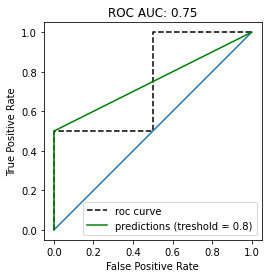

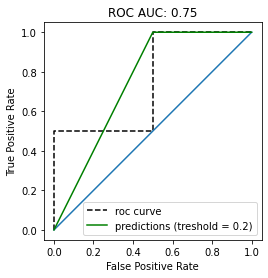

In [227]:
y = np.array([0, 1, 0, 1])
pred = np.array([0.1, 0.2, 0.6, 0.8])


show_roc(y, pred, f'ROC AUC: {roc_auc(y, pred)}', show_pred=True, treshold=0.8)
show_roc(y, pred, f'ROC AUC: {roc_auc(y, pred)}', show_pred=True, treshold=0.2)


# LifeHack
Если ROC AUC < 0.5, то можно увелить метрику до (1 - ROC AUC) простым линейным пробразованием: (1 - probabilities). Действительно, при ROC AUC < 0.5 в большинстве пар непраивильно упорядоченны объекты с меткой ноль и единица, проделав операцию (1 - probabilities) мы просто меняем их мествами.

число пар (y_i, pred_i):  16
число правильно упорядоченных пар:  4
Our ROC AUC - доля правильное упорядоченных пар:  0.25
ROC AUC score:  0.25


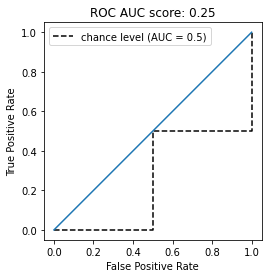

число пар (y_i, pred_i):  16
число правильно упорядоченных пар:  4
Our ROC AUC - доля правильное упорядоченных пар:  0.25
ROC AUC score:  0.75


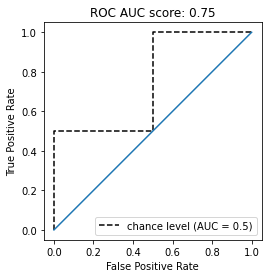

In [158]:
y = np.array([0, 1, 0, 1])
pred = np.array([0.9, 0.8, 0.4, 0.2])
predictions = (pred>0.5).astype(int)

predictions_pairs = np.array([y, pred]).T
pairs = [i for i in list(itertools.product(predictions_pairs, predictions_pairs))]
n_right_pairs = sum([pair[0][0]==int(pair[0][1] > 0.5) and pair[1][0]==int(pair[1][1] > 0.5) for pair in pairs])

print('число пар (y_i, pred_i): ', len(pairs))
print('число правильно упорядоченных пар: ', n_right_pairs)
print('Our ROC AUC - доля правильное упорядоченных пар: ', n_right_pairs/len(pairs))
print('ROC AUC score: ', roc_auc_score(y, pred))
assert n_right_pairs/len(pairs) == roc_auc_score(y, pred)

show_roc(y, pred, f'ROC AUC score: {roc_auc_score(y, pred)}')


pred_hacked = 1 - pred
predictions = (pred_hacked>0.5).astype(int)

print('число пар (y_i, pred_i): ', len(pairs))
print('число правильно упорядоченных пар: ', n_right_pairs)
print('Our ROC AUC - доля правильное упорядоченных пар: ', n_right_pairs/len(pairs))
print('ROC AUC score: ', roc_auc_score(y, pred_hacked))

show_roc(y, pred_hacked, f'ROC AUC score: {roc_auc_score(y, pred_hacked)}')
assert n_right_pairs/len(pairs) == roc_auc_score(y, pred)


# Преобразрвания

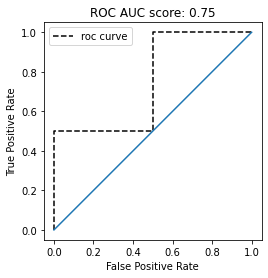

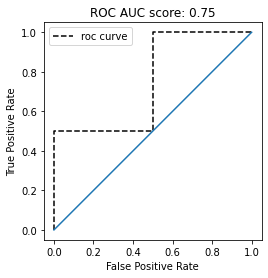

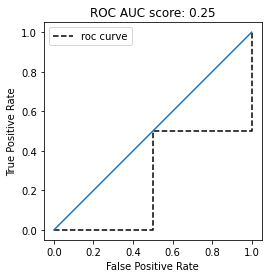

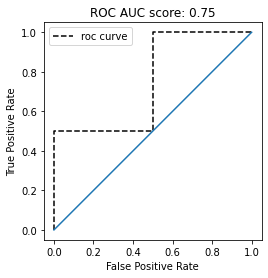

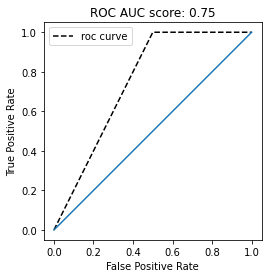

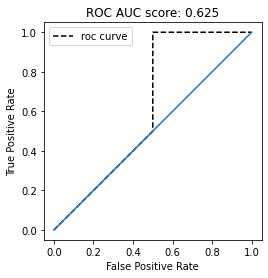

In [5]:
y = np.array([1, 0, 1, 0])
pred = np.array([0.9, 0.8, 0.4, 0.2])

show_roc(y, pred, f'ROC AUC score: {roc_auc_score(y, pred)}')

show_roc(y, np.sqrt(pred), f'ROC AUC score: {roc_auc_score(y, np.sqrt(pred))}')
show_roc(y, -np.log(pred), f'ROC AUC score: {roc_auc_score(y, -np.log(pred))}')


show_roc(y, np.maximum(0.3, pred), f'ROC AUC score: {roc_auc_score(y, np.maximum(0.3, pred))}')
show_roc(y, np.minimum(0.3, pred), f'ROC AUC score: {roc_auc_score(y, np.minimum(0.3, pred))}')
show_roc(y, np.minimum(0.5, pred), f'ROC AUC score: {roc_auc_score(y, np.minimum(0.5, pred))}')
